In [1]:
import numpy as np
import pandas as pd


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('10_01_train_dataset.csv')
df.head()

,day_count_0_25,day_count_0_5,day_count_0_75,day_count_1_0,day_count_2_0,day_count_3_0,day_count_4_0,pop_count_0_25,pop_count_0_5,pop_count_0_75,pop_count_1_0,pop_count_2_0,pop_count_3_0,pop_count_4_0,burger_0_25,burger_0_5,burger_0_75,burger_1_0,burger_2_0,burger_3_0,burger_4_0,other_0_25,other_0_5,other_0_75,other_1_0,other_2_0,other_3_0,other_4_0,pizza_0_25,pizza_0_5,pizza_0_75,pizza_1_0,pizza_2_0,pizza_3_0,pizza_4_0,org_retail_visits_0_25,org_retail_visits_0_5,org_retail_visits_0_75,org_retail_visits_1_0,org_retail_visits_2_0,org_retail_visits_3_0,org_retail_visits_4_0,unorg_retail_visits_0_25,unorg_retail_visits_0_5,unorg_retail_visits_0_75,unorg_retail_visits_1_0,unorg_retail_visits_2_0,unorg_retail_visits_3_0,unorg_retail_visits_4_0,High_0_25,High_0_5,High_0_75,High_1_0,High_2_0,High_3_0,High_4_0,Medium_0_25,Medium_0_5,Medium_0_75,Medium_1_0,Medium_2_0,Medium_3_0,Medium_4_0,Low_0_25,Low_0_5,Low_0_75,Low_1_0,Low_2_0,Low_3_0,Low_4_0,density_lvl_0_25,density_lvl_0_5,density_lvl_0_75,density_lvl_1_0,density_lvl_2_0,density_lvl_3_0,density_lvl_4_0,road_cnt_0_25,road_cnt_0_5,road_cnt_0_75,road_cnt_1_0,road_cnt_2_0,road_cnt_3_0,road_cnt_4_0,coffee_shop_0_25,coffee_shop_0_5,coffee_shop_0_75,coffee_shop_1_0,coffee_shop_2_0,coffee_shop_3_0,coffee_shop_4_0,fast_food_restaurant_0_25,fast_food_restaurant_0_5,fast_food_restaurant_0_75,fast_food_restaurant_1_0,fast_food_restaurant_2_0,fast_food_restaurant_3_0,fast_food_restaurant_4_0,ice_cream_shop_0_25,ice_cream_shop_0_5,ice_cream_shop_0_75,ice_cream_shop_1_0,ice_cream_shop_2_0,ice_cream_shop_3_0,ice_cream_shop_4_0,pizza_restaurant_0_25,pizza_restaurant_0_5,pizza_restaurant_0_75,pizza_restaurant_1_0,pizza_restaurant_2_0,pizza_restaurant_3_0,pizza_restaurant_4_0,restaurant_0_25,restaurant_0_5,restaurant_0_75,restaurant_1_0,restaurant_2_0,restaurant_3_0,restaurant_4_0,size,concept_type,city,region,target
0,590,2022,3720,6944,24673,48211,64642,564,2006,3565,6783,24054,46564,62504,1,2,2,3,4,12,13,0,0,0,0,0,1,1,1,1,1,1,2,7,8,0,0,0,0,12964,12964,37642,0,512,4695,12182,71787,308270,308270,0,0,0,0,0,0,0,9,36,70,120,406,813,1190,0,0,0,0,0,0,0,3.722222,3.166667,2.957143,3.183333,2.922105,2.799091,2.617372,79,260,497,807,2798,5666,7985,0,0,0,0,0,1,2,0,0,0,1,2,7,7,1,1,1,1,2,3,3,1,1,1,1,2,6,7,1,2,3,3,6,8,8,286.8573,IL,riyadh,riyadh_region,4888254.998
1,427,1120,1949,3410,11167,20545,35977,250,907,1725,3025,10375,19684,34746,4,4,5,6,10,10,13,0,0,0,0,0,0,1,0,0,0,1,4,4,5,307762,435082,435082,438899,500172,549748,580722,1105,4420,8421,32960,169415,301057,434087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.950000,2.472973,2.119048,2.214765,2.019348,1.975992,1.908105,35,118,219,369,1327,2511,4168,0,0,1,1,5,5,7,1,1,1,2,5,5,5,0,0,0,0,0,2,3,1,1,1,2,6,7,8,3,3,3,3,7,9,12,72.3200,FC,other,ḥail_province,2862160.623
2,532,2710,5176,10186,36727,68759,116027,539,2662,5099,10253,36994,69292,116550,0,0,1,2,9,10,26,0,0,0,0,0,0,1,1,1,4,4,5,5,8,0,0,0,0,0,27072,1717994,3172,3172,8234,28058,182025,384826,689711,0,0,0,0,0,0,3,2,16,36,70,291,581,883,6,22,42,75,275,700,1383,3.777778,3.576923,3.463415,3.360000,3.264605,3.193793,3.020382,103,291,630,1080,3691,7754,13846,1,1,2,2,2,4,5,0,0,0,0,2,2,12,0,0,1,1,4,4,8,2,2,4,4,6,6,11,1,1,2,2,8,11,18,196.9590,ILDT,dammam,eastern_province,4033007.517
3,682,2464,4089,7273,26611,42798,59421,682,2507,4093,7072,26192,41967,58323,0,0,0,0,4,14,14,0,0,0,0,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,632520,927748,18282,18282,25874,25874,101899,315596,479070,0,0,0,0,29,133,324,0,0,0,11,197,417,594,10,35,83,127,282,439,679,2.100000,2.228571,2.178571,2.269231,2.285336,2.210261,2.018275,85,274,536,915,3250,5526,8181,0,0,0,0,0,0,1,0,0,0,0,3,6,6,0,0,0,0,2,3,6,0,0,0,0,2,4,6,0,0,0,1,3,13,14,129.5000,ILDT,other,eastern_province,3683833.046
4,754,2155,4225,6657,25903,56247,109079,798,2225,4436,6958,26105,55766,109197,1,3,4,5,12,30,47,0,0,0,0,1,3,5,0,0,1,2,4,4,7,0,0,705,1410,152210,1737477,3616601,29578,63144,91884,120941,277981,500471,1047923,9,37,82,145,566,1191,1718,0,0,0,0,0,32,231,0,0,0,0,0,0,0,4.277778,3.98648

### 1.EDA 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [5]:
new_df = df[['day_count_0_25','pop_count_0_25','burger_0_25','pizza_0_25','org_retail_visits_0_25','High_0_25','Medium_0_25','Low_0_25','density_lvl_0_25','road_cnt_0_5','coffee_shop_0_25','fast_food_restaurant_0_25','pizza_restaurant_0_25','size','target']]

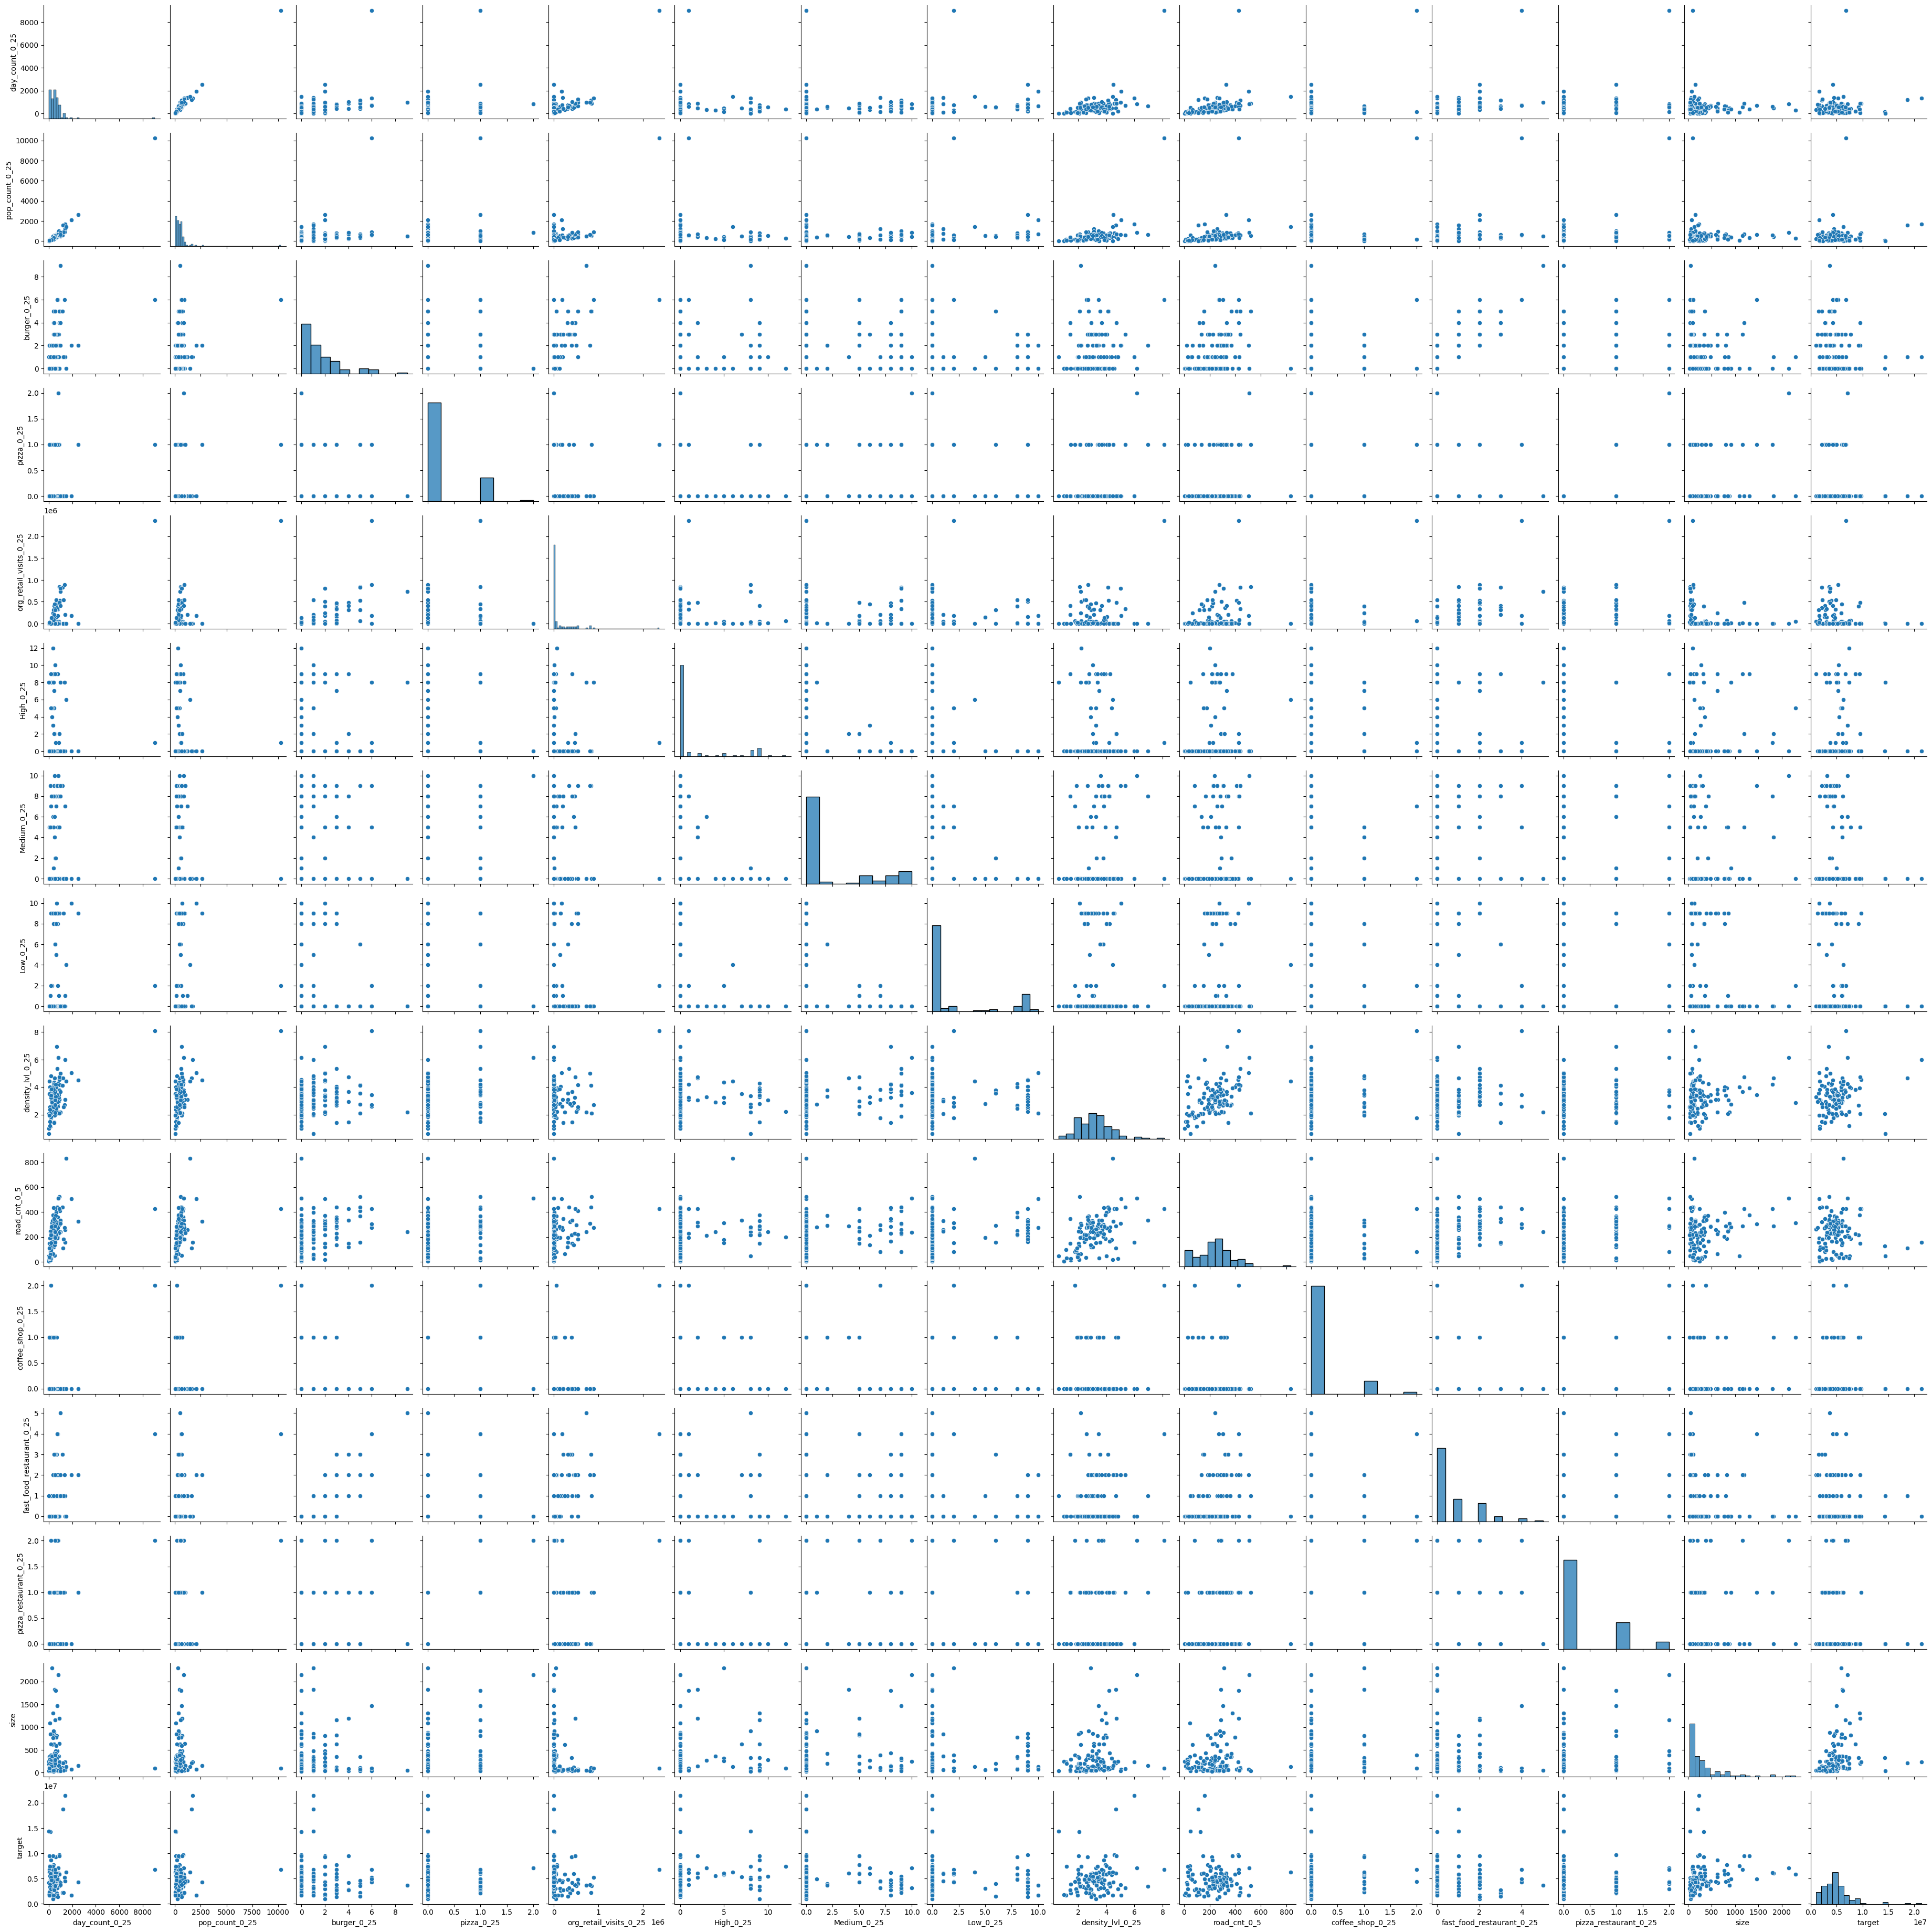

In [6]:
sns.pairplot(new_df)

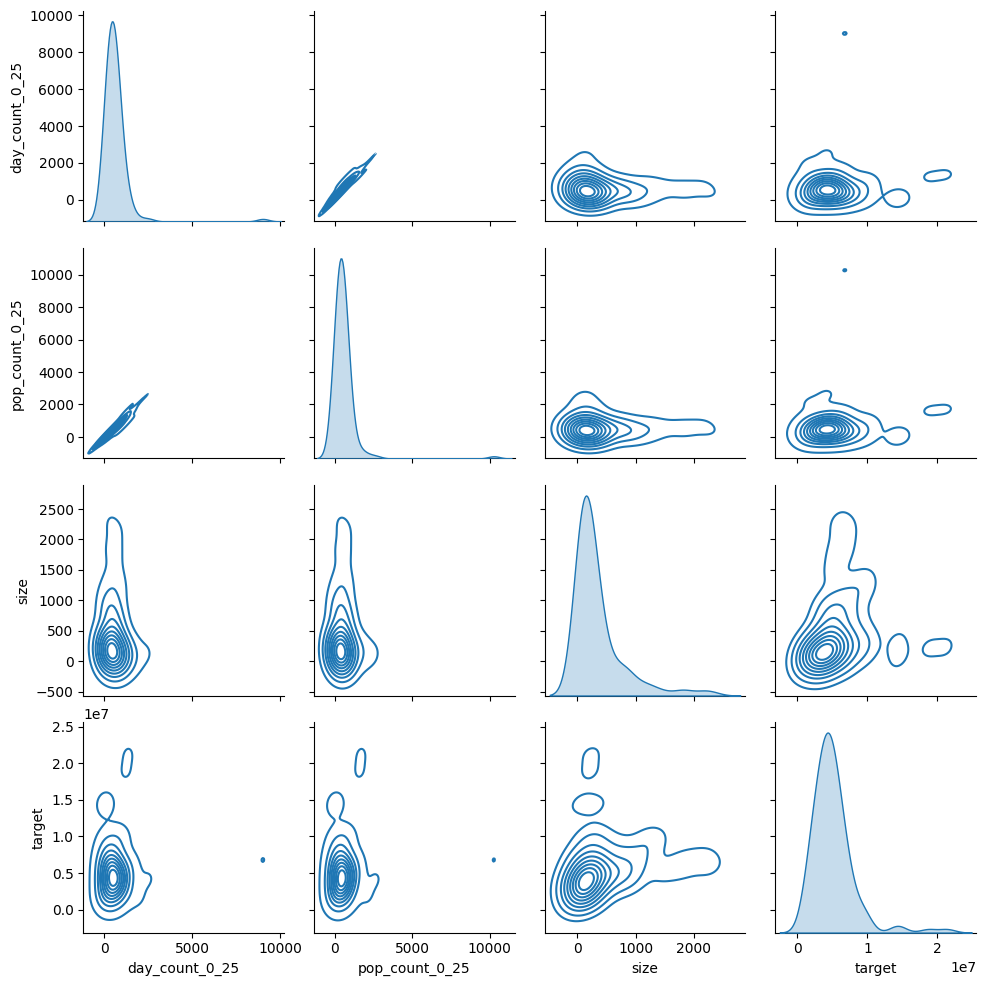

In [7]:
sns.pairplot(df[['day_count_0_25','pop_count_0_25','size','target']],kind = 'kde')

<AxesSubplot: >

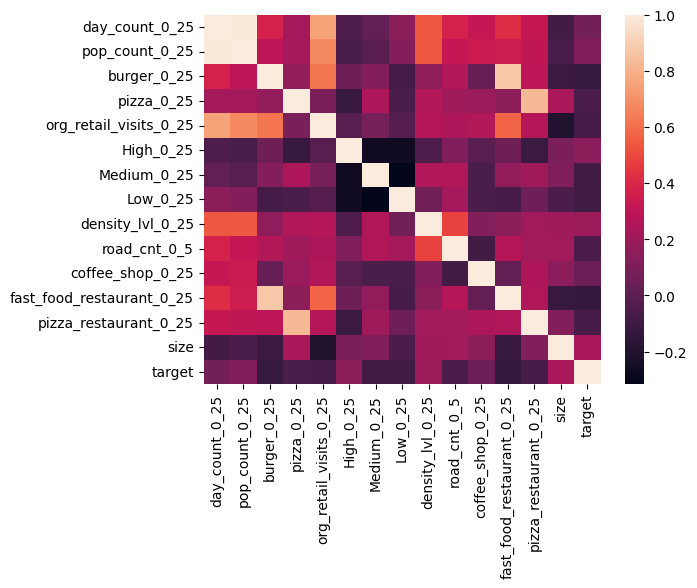

In [8]:
sns.heatmap(new_df.corr())

In [9]:
df['city'].value_counts()

riyadh    45
other     32
jeddah    16
dammam     9
makkah     7
madina     5
khobar     2
Name: city, dtype: int64

In [10]:
df['region'].value_counts()

riyadh_region         47
makkah_region         29
eastern_province      23
medina_province        9
ḥail_province          2
tabuk_province         2
asir_province          2
al-qassim_province     1
jazan_province         1
Name: region, dtype: int64

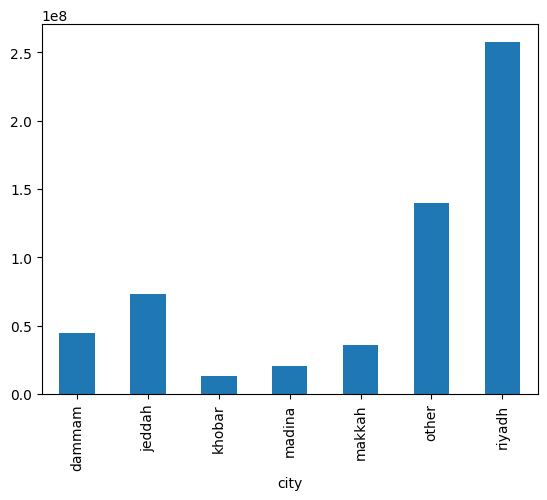

In [11]:
df.groupby('city')['target'].sum().plot(kind='bar')
plt.show()

In [12]:
data = df.groupby('city')[['target','size']].sum().reset_index()
data

,city,target,size
0,dammam,4.483539e+07,1644.0390
1,jeddah,7.322042e+07,2896.3449
2,khobar,1.329196e+07,2064.6000
3,madina,2.082374e+07,1103.0880
4,makkah,3.584199e+07,1421.5040
5,other,1.402037e+08,6357.5788
6,riyadh,2.575983e+08,24668.0560


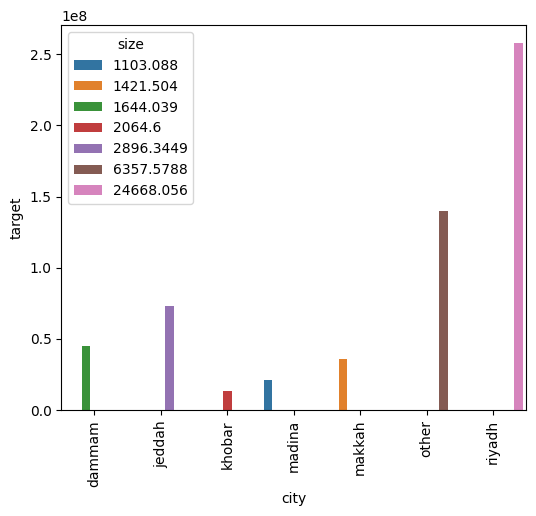

In [13]:
plt.figure(figsize=(6,5))
sns.barplot(data,x='city',y='target',hue='size',width=0.9)
plt.xticks(rotation = 'vertical')
plt.show()

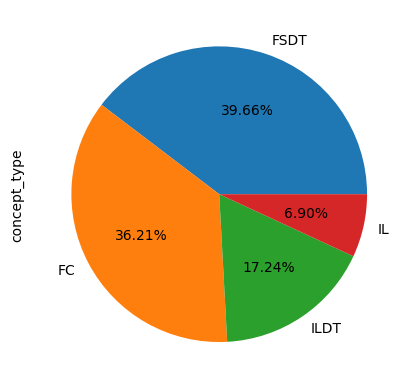

In [14]:
df['concept_type'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()

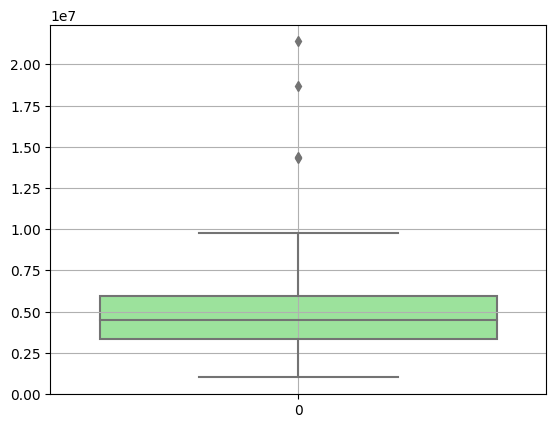

In [15]:
sns.boxplot(df['target'],color = 'lightgreen')
plt.grid()

<AxesSubplot: ylabel='Density'>

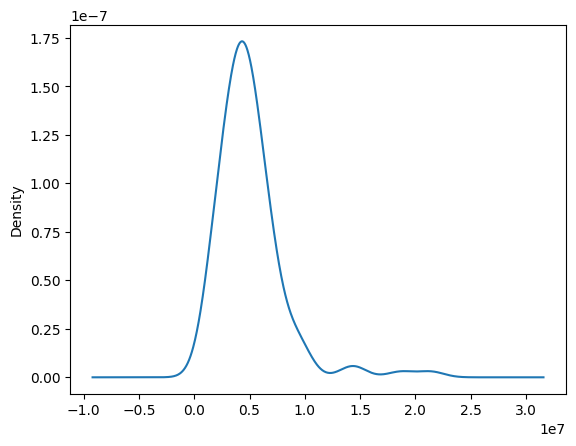

In [16]:
df['target'].plot(kind = 'kde')

<AxesSubplot: ylabel='Density'>

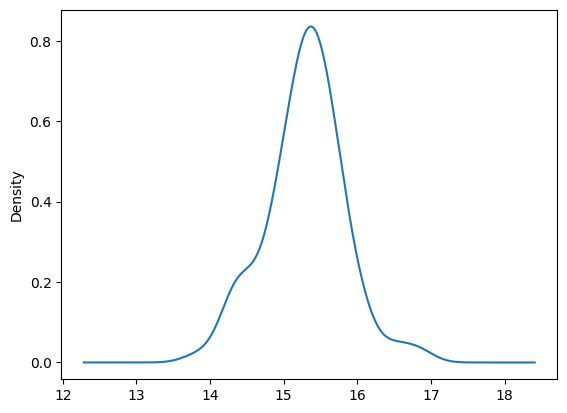

In [17]:
copy_df = df.copy()
copy_df['target'] = np.log1p(df['target'])

copy_df['target'].plot(kind='kde')

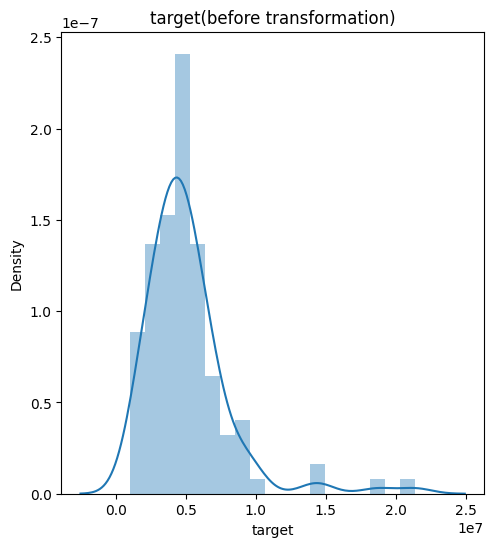

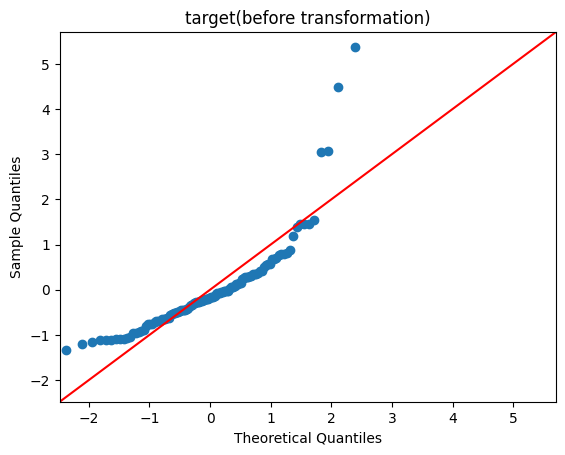

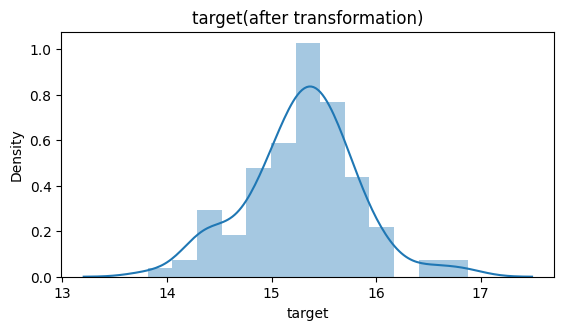

<Figure size 1400x1100 with 0 Axes>

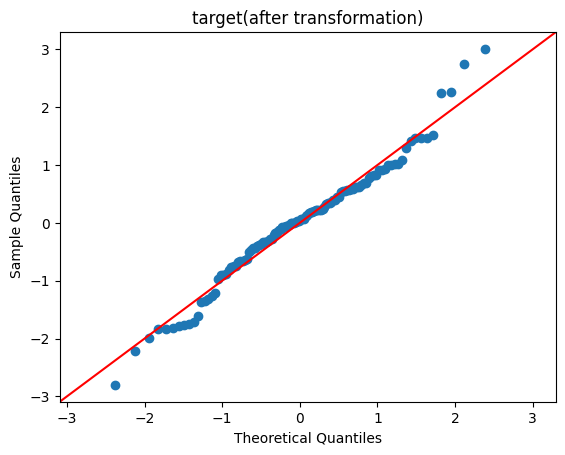

In [18]:
# before transformation
import statsmodels.api as sm

plt.figure(figsize=(12,6))
plt.subplot(121)
sns.distplot(df['target'])
plt.title('target(before transformation)')

sm.qqplot(df['target'],  line='45',fit = True)
plt.title('target(before transformation)')

plt.show()

# after transformation
plt.figure(figsize=(14,7))
plt.subplot(221)
sns.distplot(copy_df['target'])
plt.title('target(after transformation)')
plt.figure(figsize=(14,11))
sm.qqplot(copy_df['target'],  line='45',fit = True)

plt.title('target(after transformation)')

plt.show()

In [19]:
df.corr()['target'].sort_values(ascending = False)

target                       1.000000
size                         0.229698
density_lvl_0_25             0.194033
other_2_0                    0.177348
High_1_0                     0.148149
High_0_75                    0.145337
High_0_25                    0.141622
High_2_0                     0.141121
High_0_5                     0.140927
High_3_0                     0.130473
High_4_0                     0.118682
pop_count_0_25               0.115527
other_4_0                    0.108626
other_3_0                    0.085889
day_count_0_25               0.071057
other_1_0                    0.068598
density_lvl_0_5              0.066462
burger_2_0                   0.065341
pop_count_0_5                0.064383
other_0_75                   0.063318
fast_food_restaurant_2_0     0.053632
coffee_shop_0_25             0.047006
unorg_retail_visits_0_75     0.041526
day_count_0_5                0.037075
unorg_retail_visits_0_5      0.035389
unorg_retail_visits_1_0      0.029915
unorg_retail

In [20]:
copy_df.corr()['target'].sort_values(ascending = False)

target                       1.000000
size                         0.338420
High_1_0                     0.188919
High_0_75                    0.185648
High_2_0                     0.182996
density_lvl_0_25             0.178107
High_0_5                     0.176370
High_0_25                    0.173875
High_3_0                     0.164935
burger_2_0                   0.164203
High_4_0                     0.152241
other_2_0                    0.131939
coffee_shop_3_0              0.117039
other_4_0                    0.115129
fast_food_restaurant_2_0     0.109801
pop_count_0_25               0.106357
coffee_shop_0_25             0.099676
pop_count_0_5                0.093784
org_retail_visits_2_0        0.092111
pizza_restaurant_2_0         0.088864
density_lvl_0_5              0.087512
unorg_retail_visits_2_0      0.084688
pop_count_0_75               0.084599
pizza_2_0                    0.083854
unorg_retail_visits_0_75     0.080161
unorg_retail_visits_1_0      0.077897
coffee_shop_

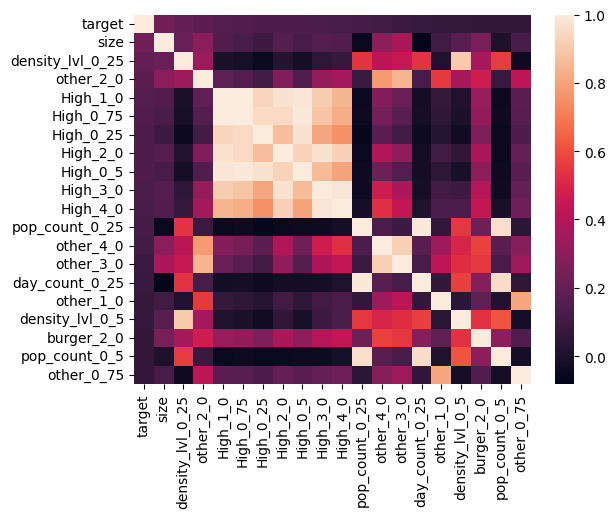

In [21]:
col1 = df.corr()['target'].sort_values(ascending = False)[:20].index
sns.heatmap(df[col1].corr())
plt.show()

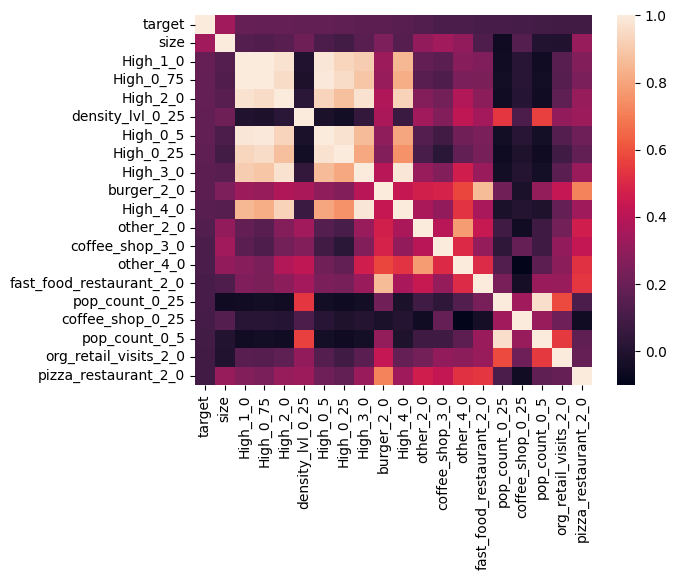

In [22]:
col2 = copy_df.corr()['target'].sort_values(ascending = False)[:20].index
sns.heatmap(copy_df[col2].corr())
plt.show()

### 2. Feature Selection

In [23]:
from sklearn.preprocessing import OrdinalEncoder
data_label_encoded = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

[array(['FC', 'FSDT', 'IL', 'ILDT'], dtype=object)]
[array(['dammam', 'jeddah', 'khobar', 'madina', 'makkah', 'other',
       'riyadh'], dtype=object)]
[array(['al-qassim_province', 'asir_province', 'eastern_province',
       'jazan_province', 'makkah_region', 'medina_province',
       'riyadh_region', 'tabuk_province', 'ḥail_province'], dtype=object)]


In [24]:
data_label_encoded.drop(columns = ['target'],inplace = True)
y = np.log1p(df['target'])

In [25]:
#recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
estimator = RandomForestRegressor()

selector_label = RFE(estimator, n_features_to_select=data_label_encoded.shape[1], step=1)
selector_label = selector_label.fit(data_label_encoded, y)
selected_features = data_label_encoded.columns[selector_label.support_]

selected_coefficients = selector_label.estimator_.feature_importances_

fi_df1 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score_rf': selected_coefficients
}).sort_values(by='rfe_score_rf', ascending=False)

fi_df1

,feature,rfe_score_rf
119,size,0.271459
70,density_lvl_0_25,0.061501
0,day_count_0_25,0.036881
7,pop_count_0_25,0.035487
120,concept_type,0.025740
55,High_4_0,0.022896
54,High_3_0,0.022626
76,density_lvl_4_0,0.022366
77,road_cnt_0_25,0.018897
78,road_cnt_0_5,0.017062


In [26]:
estimator = ExtraTreesRegressor()

selector_label = RFE(estimator, n_features_to_select=data_label_encoded.shape[1], step=1)
selector_label = selector_label.fit(data_label_encoded, y)
selected_features = data_label_encoded.columns[selector_label.support_]

selected_coefficients = selector_label.estimator_.feature_importances_


fi_df2 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score_et': selected_coefficients
}).sort_values(by='rfe_score_et', ascending=False)

fi_df2

,feature,rfe_score_et
119,size,0.124877
120,concept_type,0.066949
122,region,0.035205
7,pop_count_0_25,0.030811
70,density_lvl_0_25,0.029037
112,restaurant_0_25,0.028335
76,density_lvl_4_0,0.016527
77,road_cnt_0_25,0.016117
25,other_2_0,0.013044
17,burger_1_0,0.012674


In [27]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(data_label_encoded, y, test_size=0.2, random_state=42)

rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

fi_df3 = pd.DataFrame({
    'feature': data_label_encoded.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df3

,feature,permutation_importance
119,size,0.389153
70,density_lvl_0_25,0.017111
120,concept_type,0.011989
26,other_3_0,0.010100
74,density_lvl_2_0,0.009625
9,pop_count_0_75,0.007917
37,org_retail_visits_0_75,0.006862
67,Low_2_0,0.005735
75,density_lvl_3_0,0.005296
115,restaurant_1_0,0.004478


In [28]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').set_index('feature')

In [29]:
final_fi_df.head()

,rfe_score_rf,rfe_score_et,permutation_importance
feature,,,
size,0.271459,0.124877,0.389153
density_lvl_0_25,0.061501,0.029037,0.017111
day_count_0_25,0.036881,0.012549,-0.000605
pop_count_0_25,0.035487,0.030811,-0.001260
concept_type,0.025740,0.066949,0.011989


In [30]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [31]:
final_fi_df

,rfe_score_rf,rfe_score_et,permutation_importance
feature,,,
size,0.271459,0.124877,1.384408
density_lvl_0_25,0.061501,0.029037,0.060871
day_count_0_25,0.036881,0.012549,-0.002152
pop_count_0_25,0.035487,0.030811,-0.004483
concept_type,0.025740,0.066949,0.042652
High_4_0,0.022896,0.008032,-0.022030
High_3_0,0.022626,0.006194,-0.061991
density_lvl_4_0,0.022366,0.016527,-0.017136
road_cnt_0_25,0.018897,0.016117,0.013053


In [32]:
final_ft = final_fi_df[['rfe_score_rf','rfe_score_et','permutation_importance',]].mean(axis=1).sort_values(ascending=False)


In [34]:
final_ft= final_ft.reset_index(name = 'ft_importance')

In [35]:
final_ft = final_ft[final_ft['ft_importance'] > 0]

In [36]:
final_col = final_ft.feature.values.tolist()


In [37]:
final_df = data_label_encoded[final_col]

### 3. Model Selection

In [38]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor


In [39]:
svr = SVR()
rd = Ridge()  
ls = Lasso()
dt = DecisionTreeRegressor()
rf =RandomForestRegressor()
et = ExtraTreesRegressor(n_estimators=500, max_depth=None)
gb = GradientBoostingRegressor()
ab = AdaBoostRegressor()
mlp = MLPRegressor()
xgboost = XGBRegressor()
lr = LinearRegression()

In [40]:
from sklearn.preprocessing import PowerTransformer
pt1 = PowerTransformer()
X_transformed_final = pt1.fit_transform(final_df)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(final_df,y,test_size = 0.2, random_state = 42)
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

np.mean(cross_val_score(et,X_transformed_final,y,scoring='r2'))

0.050461272073131044

In [42]:
#before power transform
def scorer(model_name, model):
    
    output = []
    
    output.append(model_name)
    

    kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
    scores = cross_val_score(model, final_df, y, cv = kfold, scoring = 'r2')
    
    output.append(scores.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size = 0.2, random_state = 42)
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)

    
    output.append(mean_absolute_error(np.expm1(y_test), y_pred))
    
    return output
    


In [43]:
model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'extra trees': ExtraTreesRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'xgboost':XGBRegressor()
}

In [44]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

In [45]:
model_output

[['linear_reg', -14.23577477008583, 5004291.376141896],
 ['svr', -0.18690732255003034, 5004288.914981951],
 ['ridge', -5.564546690058718, 5004289.520634351],
 ['LASSO', -0.20762603757731063, 5004288.8534864215],
 ['decision tree', -1.117688228334821, 5004289.037886808],
 ['random forest', 0.06398011391133987, 5004289.000606676],
 ['extra trees', 0.10579360332772465, 5004289.007927268],
 ['gradient boosting', 0.12057172245972306, 5004288.997960488],
 ['adaboost', 0.018644252421614504, 5004289.022991799],
 ['xgboost', -0.1069673880029812, 5004288.984758674]]

In [46]:
model_df = pd.DataFrame(model_output, columns=['name','r2','mae'])
model_df.sort_values(['r2'],ascending=False)

,name,r2,mae
7,gradient boosting,0.120572,5.004289e+06
6,extra trees,0.105794,5.004289e+06
5,random forest,0.063980,5.004289e+06
8,adaboost,0.018644,5.004289e+06
9,xgboost,-0.106967,5.004289e+06
1,svr,-0.186907,5.004289e+06
3,LASSO,-0.207626,5.004289e+06
4,decision tree,-1.117688,5.004289e+06
2,ridge,-5.564547,5.004290e+06
0,linear_reg,-14.235775,5.004291e+06


In [47]:
#after power transform
def scorer_tr(model_name, model):
    
    output = []
    
    output.append(model_name)
    

    kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)
    scores = cross_val_score(model, X_transformed_final, y, cv = kfold, scoring = 'r2')
    
    output.append(scores.mean())
    
    X_train, X_test, y_train, y_test = train_test_split(X_transformed_final, y, test_size = 0.2, random_state = 42)
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)

    
    output.append(mean_absolute_error(np.expm1(y_test), y_pred))
    
    return output
    




In [48]:
model_output_tr = []
for model_name,model in model_dict.items():
    model_output_tr.append(scorer_tr(model_name, model))

In [49]:
model_output_tr

[['linear_reg', -7.876078034889304, 5004288.765972943],
 ['svr', 0.009909406176596603, 5004289.030282759],
 ['ridge', -1.1682742573230824, 5004289.359950828],
 ['LASSO', -0.12621773720047774, 5004288.988186595],
 ['decision tree', -0.7385052036576006, 5004289.062888076],
 ['random forest', 0.05059164993352826, 5004289.0138756065],
 ['extra trees', 0.1151356156995151, 5004289.0118746795],
 ['gradient boosting', 0.09707586483023435, 5004289.012086354],
 ['adaboost', 0.07945859867664157, 5004289.031530596],
 ['xgboost', -0.1069673880029812, 5004288.984758674]]

In [50]:
model_df_tr = pd.DataFrame(model_output_tr, columns=['name','r2_tr','mae_tr'])
model_df_tr.sort_values(['r2_tr'],ascending=False)

,name,r2_tr,mae_tr
6,extra trees,0.115136,5.004289e+06
7,gradient boosting,0.097076,5.004289e+06
8,adaboost,0.079459,5.004289e+06
5,random forest,0.050592,5.004289e+06
1,svr,0.009909,5.004289e+06
9,xgboost,-0.106967,5.004289e+06
3,LASSO,-0.126218,5.004289e+06
4,decision tree,-0.738505,5.004289e+06
2,ridge,-1.168274,5.004289e+06
0,linear_reg,-7.876078,5.004289e+06


In [51]:
res_df = model_df.merge(model_df_tr,on = 'name' ).sort_values('r2',ascending = False)
res_df

,name,r2,mae,r2_tr,mae_tr
7,gradient boosting,0.120572,5.004289e+06,0.097076,5.004289e+06
6,extra trees,0.105794,5.004289e+06,0.115136,5.004289e+06
5,random forest,0.063980,5.004289e+06,0.050592,5.004289e+06
8,adaboost,0.018644,5.004289e+06,0.079459,5.004289e+06
9,xgboost,-0.106967,5.004289e+06,-0.106967,5.004289e+06
1,svr,-0.186907,5.004289e+06,0.009909,5.004289e+06
3,LASSO,-0.207626,5.004289e+06,-0.126218,5.004289e+06
4,decision tree,-1.117688,5.004289e+06,-0.738505,5.004289e+06
2,ridge,-5.564547,5.004290e+06,-1.168274,5.004289e+06
0,linear_reg,-14.235775,5.004291e+06,-7.876078,5.004289e+06


### 4. Hyperparameter Tuning 

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [61]:
et = ExtraTreesRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
search = GridSearchCV(et, param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=4)
search.fit(final_df, y)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=4)

In [62]:
search.best_params_,search.best_score_

({'max_depth': None,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.1613530087915447)

In [55]:
et = ExtraTreesRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
search_tr = GridSearchCV(et, param_grid, cv=kfold, scoring='r2', n_jobs=-1, verbose=4)
search_tr.fit(X_transformed_final, y)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=4)

In [57]:
search_tr.best_params_,search_tr.best_score_

({'max_depth': None,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.14466010656884656)

In [64]:
#final r2_score
et = ExtraTreesRegressor(min_samples_split = 2, min_samples_leaf = 1, n_estimators = 100)

X_train, X_test, y_train, y_test = train_test_split(final_df, y, test_size = 0.2, random_state = 42)
et.fit(X_train,y_train)

y_pred = et.predict(X_test)
r2_score(y_test,y_pred)

0.25592868277642045